# `PROBLEM : Predicting if it's gonna rain tomorrow`

## Import Data Analysis Libraries

In [1]:
import pandas as pd
import numpy as np

## Import Visualization Libraries

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE  # Helps visualize higher dimensions data
import missingno as msno # Missing Data visualization
import seaborn as sns
sns.set(style="white")
%matplotlib inline

## Import Sklean (Machine learning framework in Python)

In [3]:
from sklearn.preprocessing import StandardScaler, normalize  # Helps us in Standardizing the data
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, average_precision_score # Evaluation
                                                                                                             # metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import model_selection, tree, preprocessing, metrics, linear_model

from sklearn.cluster import KMeans # Clustering
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE # Oversampling

/Users/priya/opt/anaconda3/envs/.venv/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Miscellaneous

In [4]:
import time
from datetime import datetime
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
pd.options.mode.chained_assignment = None  # default='warn'

## Import data

In [5]:
train = pd.read_csv('Rain Prediction Train.csv')
test = pd.read_csv('Rain Prediction Test.csv')

#### `Lets check the shape of the data frame`

In [11]:
print('The Number of Rows and Columns in the train data is:', train.shape)
print('The Number of Rows and Columns in the test data is:', test.shape)

The Number of Rows and Columns in the train data is: (100000, 23)
The Number of Rows and Columns in the test data is: (1000, 22)


#### `Let's see how the train and test data looks`

In [14]:
train.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,07-02-2014,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,...,76.0,66.0,1017.3,1016.5,7.0,4.0,21.5,24.2,Yes,No
1,23-04-2009,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,65.0,37.0,1014.0,1008.8,7.0,8.0,14.0,21.8,No,Yes


In [15]:
test.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,15-06-2013,Mildura,6.0,14.5,0.0,2.0,8.7,SSE,35.0,SW,...,17.0,77.0,43.0,1022.0,1020.6,6.0,1.0,9.2,14.2,No
1,25-03-2014,Canberra,13.4,21.2,10.6,NaN,NaN,SE,44.0,S,...,28.0,86.0,67.0,1021.6,1021.3,8.0,8.0,14.3,19.6,Yes


#### `Concise Summary of data`

In [172]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50964 entries, 0 to 99999
Data columns (total 63 columns):
MinTemp            50964 non-null float64
MaxTemp            50964 non-null float64
Rainfall           50964 non-null float64
WindGustSpeed      50964 non-null float64
WindSpeed9am       50964 non-null float64
WindSpeed3pm       50964 non-null float64
Humidity9am        50964 non-null float64
Humidity3pm        50964 non-null float64
Pressure9am        50964 non-null float64
Pressure3pm        50964 non-null float64
Cloud9am           50964 non-null float64
Temp9am            50964 non-null float64
Temp3pm            50964 non-null float64
RainToday          50964 non-null float64
RainTomorrow       50964 non-null float64
WindGustDir_E      50964 non-null float64
WindGustDir_ENE    50964 non-null float64
WindGustDir_ESE    50964 non-null float64
WindGustDir_N      50964 non-null float64
WindGustDir_NE     50964 non-null float64
WindGustDir_NNE    50964 non-null float64
WindGustD

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Location       1000 non-null   object 
 2   MinTemp        996 non-null    float64
 3   MaxTemp        1000 non-null   float64
 4   Rainfall       987 non-null    float64
 5   Evaporation    582 non-null    float64
 6   Sunshine       534 non-null    float64
 7   WindGustDir    942 non-null    object 
 8   WindGustSpeed  942 non-null    float64
 9   WindDir9am     925 non-null    object 
 10  WindDir3pm     976 non-null    object 
 11  WindSpeed9am   992 non-null    float64
 12  WindSpeed3pm   985 non-null    float64
 13  Humidity9am    994 non-null    float64
 14  Humidity3pm    979 non-null    float64
 15  Pressure9am    901 non-null    float64
 16  Pressure3pm    899 non-null    float64
 17  Cloud9am       622 non-null    float64
 18  Cloud3pm 

#### `Statistical Summary of train & test data`

In [18]:
train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,99564.000000,99784.000000,99030.000000,57367.000000,52518.000000,93460.000000,99062.000000,98146.000000,98762.000000,97456.000000,90163.000000,90188.000000,62372.000000,59989.000000,99380.000000,98090.000000
mean,12.190559,23.228404,2.346882,5.467535,7.627004,39.986818,14.008045,18.623846,68.845599,51.491155,1017.631809,1015.242128,4.432261,4.502492,16.986879,21.685637
std,6.412850,7.117851,8.357515,4.186620,3.783709,13.589459,8.898406,8.797918,19.064754,20.824180,7.105450,7.032167,2.887452,2.721770,6.500404,6.940969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.900000,28.200000,0.600000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,47.300000,278.400000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,39.400000,46.700000


In [19]:
test.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,996.000000,1000.000000,987.000000,582.000000,534.000000,942.000000,992.000000,985.000000,994.000000,979.000000,901.000000,899.000000,622.000000,577.000000,998.000000,983.000000
mean,12.588855,23.605300,2.667072,5.584021,7.510300,40.099788,14.041331,18.427411,68.955734,51.206333,1017.430744,1014.980868,4.590032,4.590988,17.297194,22.053306
std,6.514411,7.259871,12.703253,4.530007,3.876933,13.811030,9.242299,8.969747,18.847617,20.776991,7.284147,7.231707,2.952784,2.685957,6.604047,7.139274
min,-6.700000,0.200000,0.000000,0.100000,0.000000,9.000000,0.000000,0.000000,6.000000,1.000000,985.000000,980.200000,0.000000,0.000000,-1.800000,-0.200000
25%,7.700000,18.500000,0.000000,2.650000,4.700000,31.000000,7.000000,11.000000,58.000000,37.000000,1012.800000,1010.300000,1.000000,2.000000,12.300000,17.050000
50%,12.400000,22.550000,0.000000,4.600000,8.100000,37.000000,13.000000,17.000000,69.000000,50.000000,1017.500000,1014.900000,6.000000,5.000000,16.800000,21.300000
75%,17.425000,28.800000,0.600000,7.600000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.500000,1019.700000,7.000000,7.000000,22.175000,27.000000
max,27.900000,46.100000,240.000000,58.500000,13.700000,96.000000,61.000000,59.000000,100.000000,100.000000,1037.500000,1036.100000,8.000000,8.000000,35.600000,44.800000


## Visualisation

#### `Analyze Target Column : Rain Tomorrow`

#### Lets get the count of values in target column

No     77505
Yes    22495
Name: RainTomorrow, dtype: int64


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

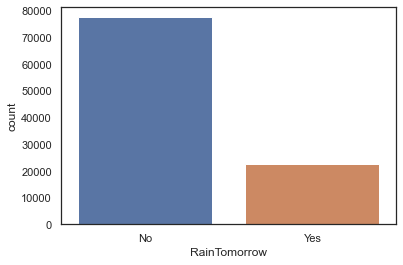

In [20]:
print(train['RainTomorrow'].value_counts())
sns.countplot(x='RainTomorrow', data=train)

#### ` WindGustDirection`

In [100]:
WindGustDir_table = pd.crosstab(index=train["WindGustDir"], columns=train["RainTomorrow"])
WindGustDir_table

RainTomorrow,No,Yes
WindGustDir,,
E,5443,962
ENE,4751,938
ESE,4303,853
N,4552,1688
NE,4055,918
NNE,3441,1079
NNW,3287,1352
NW,4037,1628
S,4840,1391


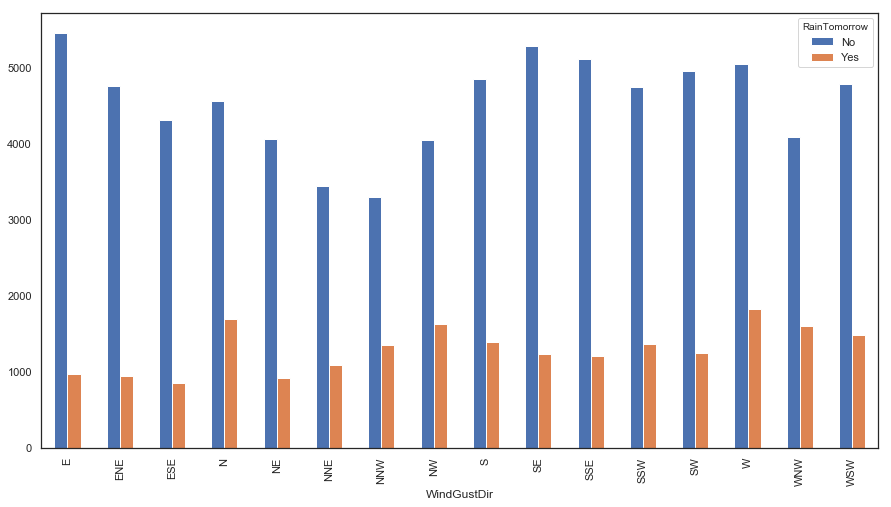

In [101]:
WindGustDir_table.plot(kind="bar", figsize=(15,8),stacked=False)

#### `WindDir9am`

In [111]:
WindDir9am_table = pd.crosstab(index=train["WindDir9am"], columns=train["RainTomorrow"])
WindDir9am_table

RainTomorrow,No,Yes
WindDir9am,,
E,5400,964
ENE,4449,957
ESE,4582,790
N,5534,2462
NE,4198,1098
NNE,4082,1469
NNW,3756,1746
NW,4348,1721
S,4791,1194


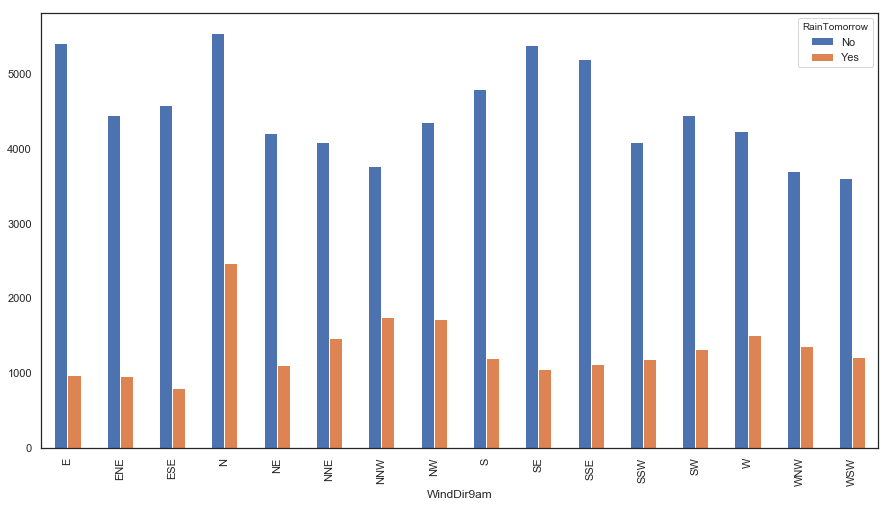

In [112]:
WindDir9am_table.plot(kind="bar", figsize=(15,8),stacked=False)

#### `WindDir3pm`

In [113]:
WindDir3pm_table = pd.crosstab(index=train["WindDir3pm"], columns=train["RainTomorrow"])
WindDir3pm_table

RainTomorrow,No,Yes
WindDir3pm,,
E,4768,1009
ENE,4465,979
ESE,4849,1019
N,4372,1697
NE,4643,1099
NNE,3445,1102
NNW,3892,1507
NW,4311,1686
S,5273,1434


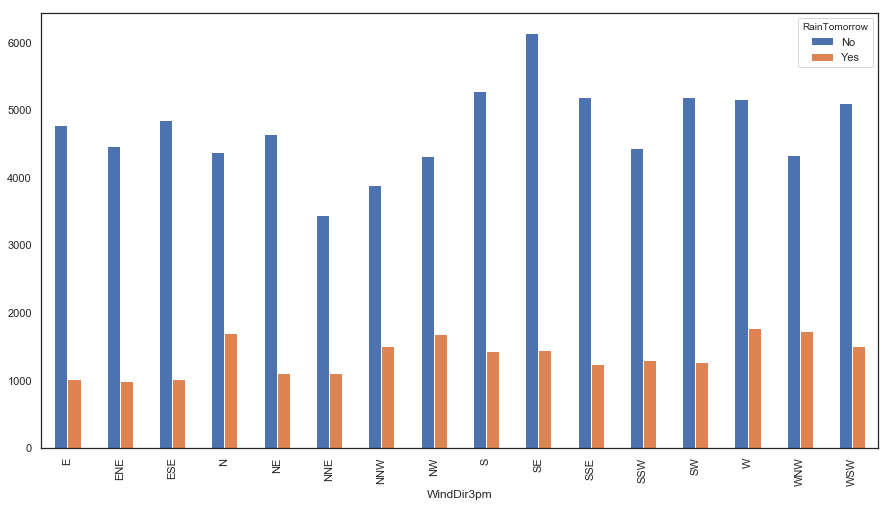

In [114]:
WindDir3pm_table.plot(kind="bar", figsize=(15,8),stacked=False)

#### `Clustering to get more insights`
#### Lets work towards elbow method to determine optimum number of clusters

In [166]:
variance = []
for k in range(1, 15):
    km = KMeans(n_clusters=k)
    km.fit(train.values)
    variance.append(km.inertia_)


####  Lets plot Elbow

Text(0.5,1,'Elbow')

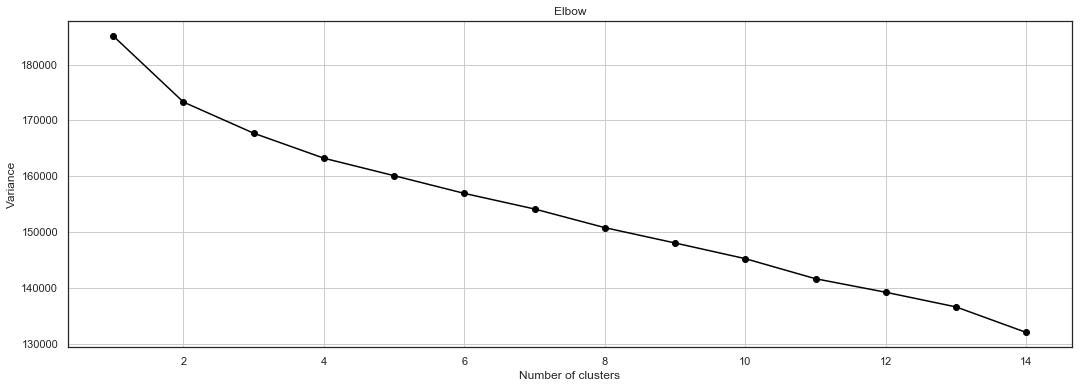

In [167]:
plt.figure(figsize = (18,6))
plt.plot(range(1, 15), variance, marker='o', color = 'black')
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Variance')
plt.title('Elbow')

In [170]:
km = KMeans(n_clusters=8,init= 'random', max_iter= 800,n_init= 300,algorithm= 'elkan', random_state= 5)
km.fit(train[:2000])
df_clustered = pd.DataFrame(km.labels_, train[:2000].index)

labels = km.labels_


In [171]:
X_tsne = TSNE(learning_rate=1000, perplexity=25, random_state=1337).fit_transform(train[:2000])
X_tsne_df = pd.DataFrame(X_tsne, columns = ['X_tsne_1', 'X_tsne_2'])
X_tsne_df['labels'] = labels

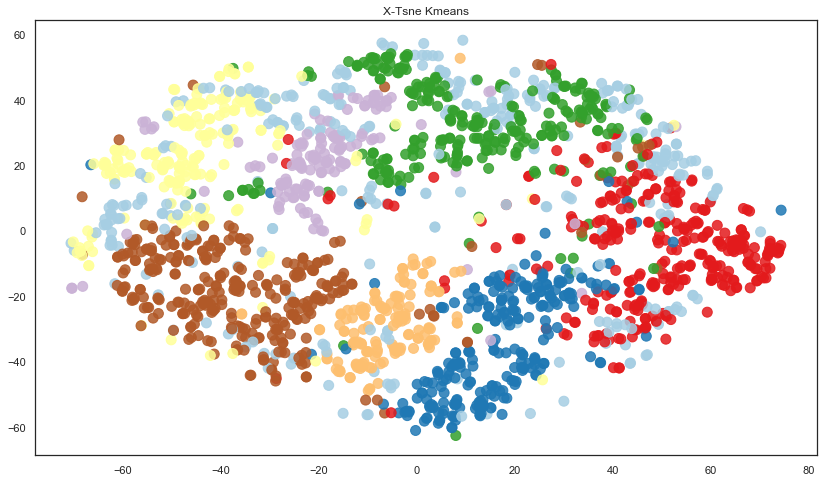

In [173]:
# Create the figure
fig = plt.figure( figsize=(14,8))
ax = fig.add_subplot(1, 1, 1, title='X-Tsne Kmeans' )
# Create the scatter
ax.scatter(
    x=X_tsne_df['X_tsne_1'], 
    y=X_tsne_df['X_tsne_2'], 
    c=X_tsne_df['labels'], 
    cmap=plt.cm.get_cmap('Paired'), 
    alpha=0.85,
    s=100)

## Pre-Processing

### `Detecting and Removing Null Values`
#### ` For the train dataset`

#### We see there are some columns with null values. 
#### Before we start pre-processing, let's find out which of the columns have maximum null values

Sunshine          52518
Evaporation       57367
Cloud3pm          59989
Cloud9am          62372
Pressure9am       90163
Pressure3pm       90188
WindDir9am        92938
WindGustDir       93419
WindGustSpeed     93460
WindDir3pm        97309
Humidity3pm       97456
Temp3pm           98090
WindSpeed3pm      98146
Humidity9am       98762
Rainfall          99030
RainToday         99030
WindSpeed9am      99062
Temp9am           99380
MinTemp           99564
MaxTemp           99784
Date             100000
Location         100000
RainTomorrow     100000
dtype: int64


<AxesSubplot:>

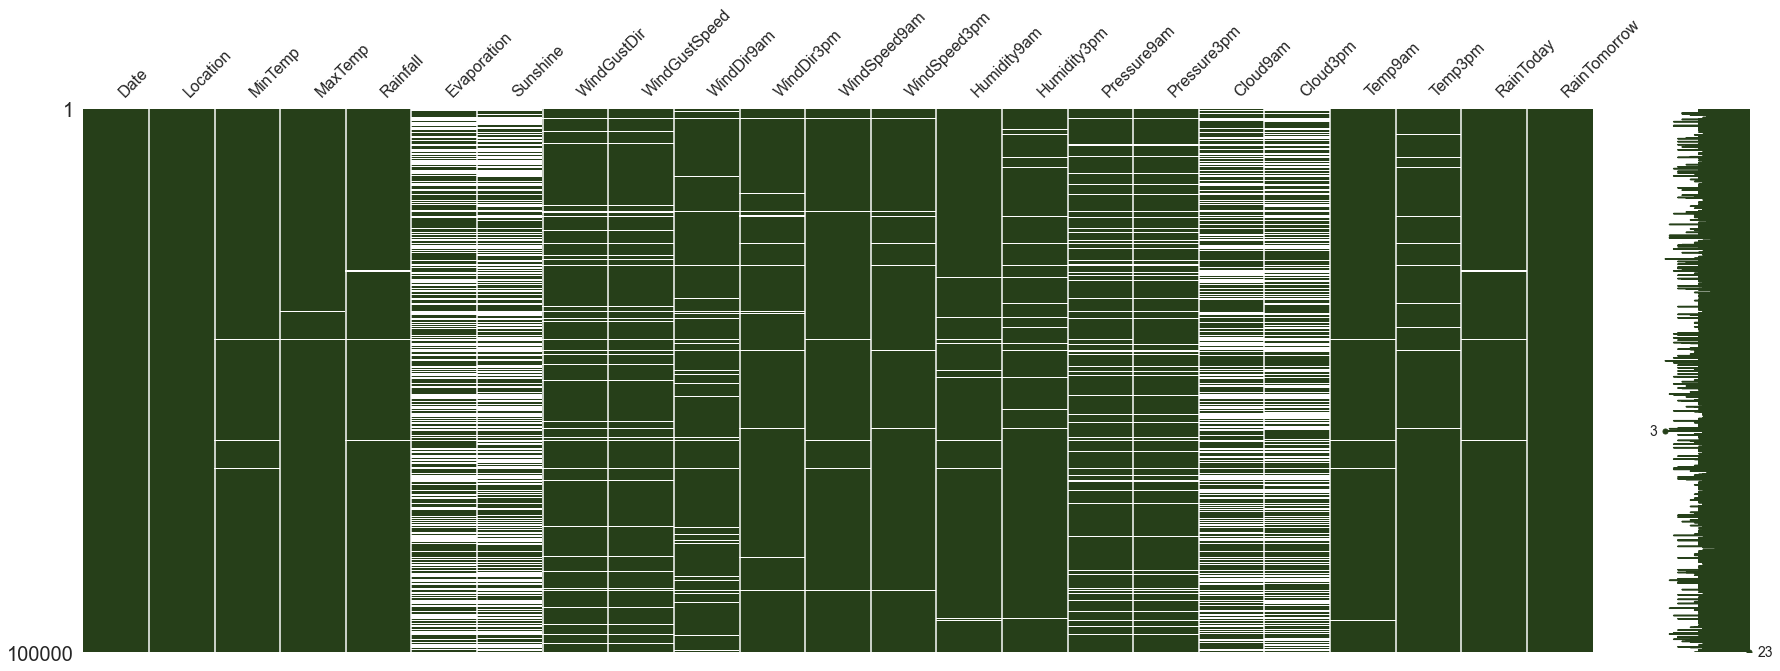

In [21]:
print(train.count().sort_values())

#Graph to find missing values in the dataframe
import missingno
missingno.matrix(train, figsize = (30,10), color=(0.15,0.25,0.10))

#### `For the test data`

#### We see there are some columns with null values. 
#### Before we start pre-processing, let's find out which of the columns have maximum null values

Sunshine          534
Cloud3pm          577
Evaporation       582
Cloud9am          622
Pressure3pm       899
Pressure9am       901
WindDir9am        925
WindGustDir       942
WindGustSpeed     942
WindDir3pm        976
Humidity3pm       979
Temp3pm           983
WindSpeed3pm      985
RainToday         987
Rainfall          987
WindSpeed9am      992
Humidity9am       994
MinTemp           996
Temp9am           998
MaxTemp          1000
Location         1000
Date             1000
dtype: int64


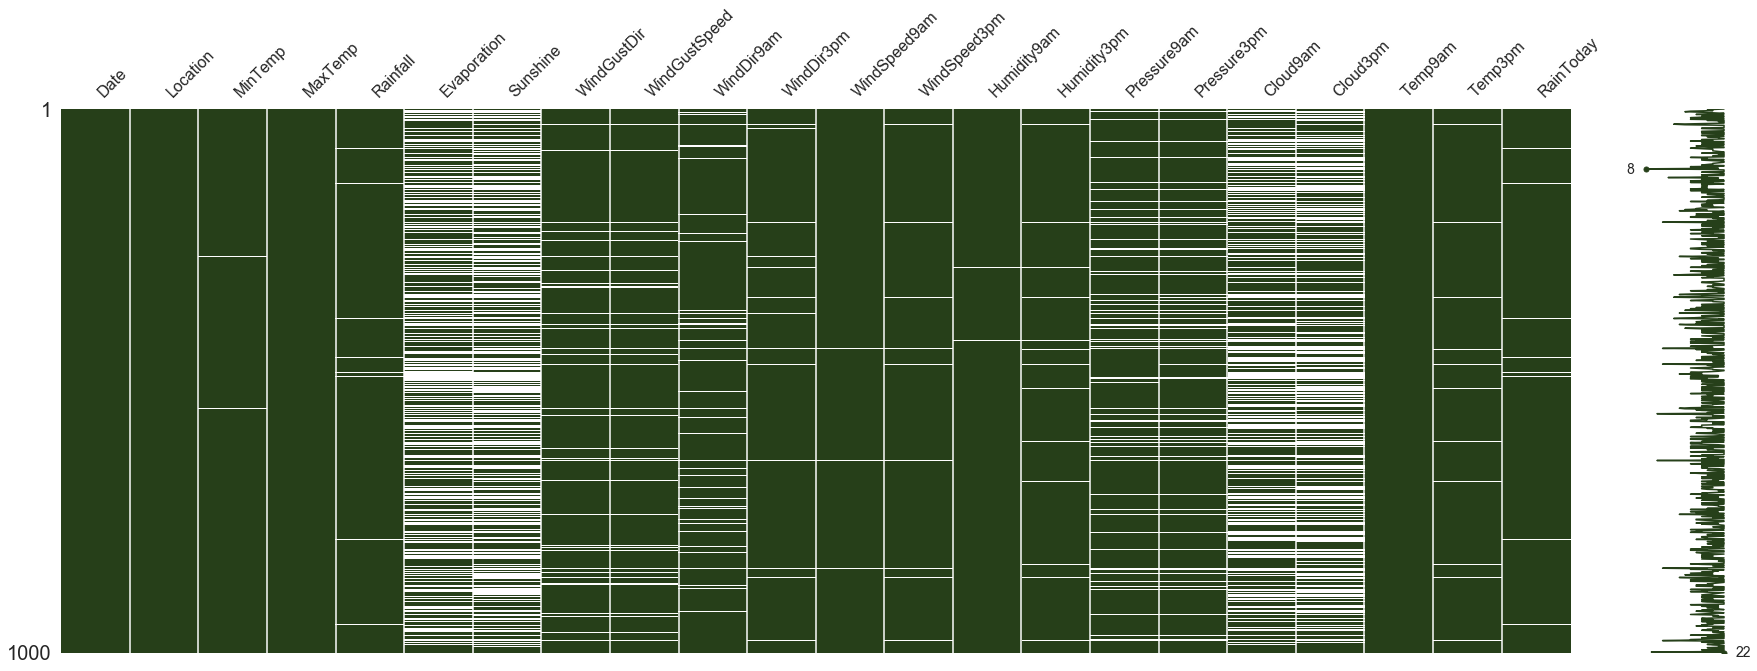

In [117]:
print(test.count().sort_values())

#Graph to find missing values in the dataframe
import missingno
missingno.matrix(test, figsize = (30,10), color=(0.15,0.25,0.10))

<b> 1. From the above result we can see that the columns named "Sunshine" , "Cloud3pm", "Evaporation" have very large number of Na values and these columns are giving less than 60% of information that means they are not giving sufficient information. So we will not take these columns forward. we will drop these columns from both train and test.

<b> 2. We also need to remove "Location" columns because here we are trying to predict that it will rain tomorrow or not and this analysis is not based on Location

<b> 3. Although we will remove date column because date will not help you in predicting rain for tomorrow. 

#### `Dropping columns with more than 80% Null Values`

In [23]:
#train
train = train.drop(columns = ['Sunshine','Evaporation','Cloud3pm','Location','Date'],axis=1)

In [24]:
#test
test = test.drop(columns = ['Sunshine','Evaporation','Cloud3pm','Location','Date'],axis=1)

#### `Null Values after removing columns from train and test data`

In [25]:
print(train.shape)
print(test.shape)

(100000, 18)
(1000, 17)


#### `Now Let's remove NA values forom the remaining column of train and test data`

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


<AxesSubplot:>

<Figure size 1152x432 with 0 Axes>

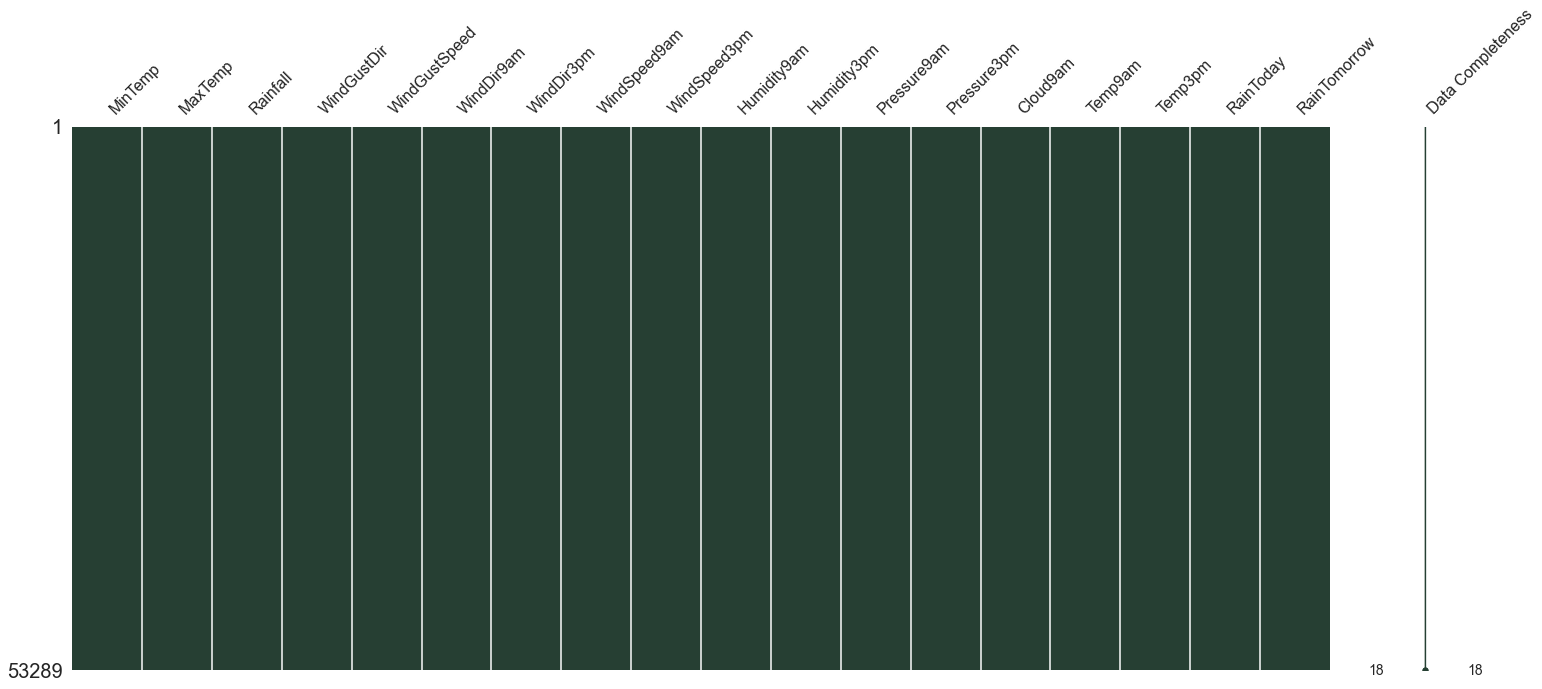

In [29]:
## For Train
train = train.dropna(axis = 'index',how='any')
print(train.isnull().sum())

plt.figure(figsize=(16,6))
msno.matrix(train,labels = True, color=(0.15,0.25,0.20))

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64


<AxesSubplot:>

<Figure size 1152x432 with 0 Axes>

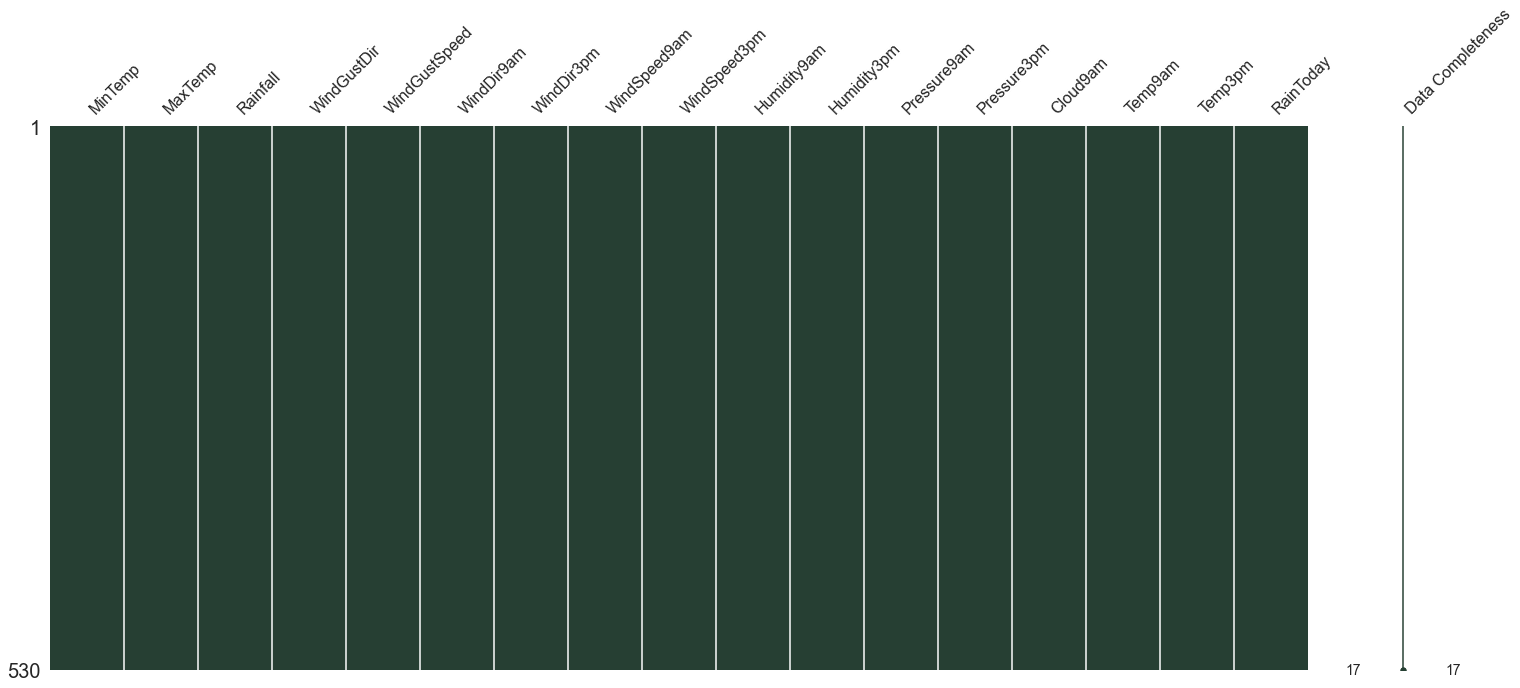

In [30]:
##for Test
test = test.dropna(axis = 'index',how='any')
print(test.isnull().sum())

plt.figure(figsize=(16,6))
msno.matrix(test,labels = True, color=(0.15,0.25,0.20))

### `Removing the outliers in our data - we are using Z-score to detect and remove the outliers.`

In [126]:
from scipy import stats
z = np.abs(stats.zscore(train._get_numeric_data()))
print(z)
train= train[(z < 3).all(axis=1)]
print(train.shape)

[[0.71302277 0.28945254 0.04099418 ... 0.90350801 0.56785853 0.26616841]
 [0.98679415 0.25696443 0.2777877  ... 0.90350801 0.56693433 0.07682843]
 [1.06405856 0.26143116 0.2777877  ... 0.83548091 0.74850119 0.1804192 ]
 ...
 [0.44594331 1.11161661 0.2777877  ... 0.90350801 0.76363176 0.97719516]
 [0.62030548 0.359506   0.2777877  ... 0.48768312 1.09742854 0.1054115 ]
 [0.68211701 0.34102858 0.2777877  ... 0.90350801 0.25011653 0.57703217]]
(50964, 18)


In [32]:
from scipy import stats
z = np.abs(stats.zscore(test._get_numeric_data()))
print(z)
test = test[(z < 3).all(axis=1)]
print(test.shape)

      MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0    1.109766  1.307080  0.223372       0.448344      0.815887      0.291598   
1    0.026450  0.375756  0.593358       0.211311      0.287507      0.970477   
3    1.539685  1.724091  0.177142       1.108000      0.374529      0.750534   
7    1.531168  1.598096  0.223372       0.138016      1.611580      1.209471   
8    0.725909  0.500859  0.223372       0.448344      0.595208      1.209471   
..        ...       ...       ...            ...           ...           ...   
993  0.756618  0.584261  0.223372       0.008574      0.839204      0.282073   
995  0.671329  1.459093  0.223372       0.211311      1.501241      0.282073   
996  0.464887  1.112475  0.223372       3.509587      4.480405      2.806223   
997  0.594558  0.347063  0.223372       3.216407      0.815887      0.750534   
999  0.655975  0.347955  0.223372       0.155164      0.374529      0.750534   

     Humidity9am  Humidity3pm  Pressure

### `Convert categorical variable into interger as our machine Learning algorithms do not take categorical value.`

### Train 
#### `1. we will change yes/no to 1/0 for RainToday and RainTomorrow.`

In [127]:
## Train
train['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
train['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

#### `2. For other cateorical columns we will use dummification to get them into integers.`
#### `but before that we will check the unique values`


In [128]:
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    print(np.unique(train[col]))
# dummification
train = pd.get_dummies(train, columns=categorical_columns)
train.iloc[4:9]

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
6,12.5,24.7,0.0,31.0,11.0,19.0,74.0,64.0,1014.1,1010.9,...,0,0,0,0,0,0,0,0,0,0
7,19.9,35.0,0.0,37.0,24.0,9.0,56.0,23.0,1017.4,1013.3,...,0,0,0,0,0,0,0,0,0,0
8,7.1,13.0,3.6,37.0,13.0,13.0,64.0,52.0,1022.0,1022.7,...,0,0,1,0,0,0,0,0,0,0
13,5.6,11.2,0.2,54.0,15.0,22.0,99.0,95.0,1021.0,1015.0,...,0,0,0,0,0,0,0,0,0,0
14,16.2,31.4,0.0,44.0,24.0,13.0,55.0,23.0,1017.3,1014.2,...,0,0,0,0,1,0,0,0,0,0


In [129]:
train.shape

(50964, 63)

### Test

In [139]:
##Test
test['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)

In [141]:
test.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Temp9am,Temp3pm,RainToday
0,6.0,14.5,0.0,SSE,35.0,SW,S,9.0,17.0,77.0,43.0,1022.0,1020.6,6.0,9.2,14.2,0
1,13.4,21.2,10.6,SE,44.0,S,SE,19.0,28.0,86.0,67.0,1021.6,1021.3,8.0,14.3,19.6,1
3,3.2,11.5,0.6,SSW,26.0,SW,SSW,13.0,13.0,100.0,85.0,1026.0,1023.6,7.0,8.4,10.6,0
7,23.2,35.4,0.0,E,43.0,E,SSW,31.0,9.0,25.0,16.0,1013.8,1009.6,1.0,26.5,34.0,0
8,8.5,20.3,0.0,SSW,35.0,N,SW,11.0,9.0,59.0,43.0,1027.2,1024.4,5.0,15.9,18.6,0


#### `For the other cateorical columns we will use dummification to get them into integers.`
#### `but before that we will check the unique values`

In [142]:
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    print(np.unique(test[col]))
# dummification
test = pd.get_dummies(test, columns=categorical_columns)
test.iloc[4:9]

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
8,8.5,20.3,0.0,35.0,11.0,9.0,59.0,43.0,1027.2,1024.4,...,0,0,0,0,0,0,0,0,0,0
9,18.8,31.3,8.2,35.0,22.0,13.0,56.0,24.0,1016.8,1013.6,...,0,0,0,0,0,0,0,0,0,0
11,13.8,18.9,0.0,24.0,7.0,13.0,58.0,59.0,1024.5,1022.6,...,0,0,0,0,0,0,0,0,0,0
14,17.7,34.4,0.0,22.0,7.0,7.0,38.0,20.0,1018.5,1015.7,...,0,0,0,0,0,0,0,0,0,0
17,14.1,34.2,0.0,31.0,7.0,15.0,32.0,20.0,1019.4,1015.8,...,0,0,0,0,0,0,0,0,0,0


### `Standardize our data`

In [130]:
#For train
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(train)
train = pd.DataFrame(scaler.transform(train), index=train.index, columns=train.columns)
train.iloc[4:10]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
6,0.498674,0.501217,0.000000,0.285714,0.243243,0.404762,0.711111,0.64,0.424821,0.404819,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.694960,0.751825,0.000000,0.371429,0.594595,0.166667,0.511111,0.23,0.503580,0.462651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.355438,0.216545,0.118421,0.371429,0.297297,0.261905,0.600000,0.52,0.613365,0.689157,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.315650,0.172749,0.006579,0.614286,0.351351,0.476190,0.988889,0.95,0.589499,0.503614,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.596817,0.664234,0.000000,0.471429,0.594595,0.261905,0.500000,0.23,0.501193,0.484337,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16,0.498674,0.725061,0.000000,0.528571,0.594595,0.523810,0.022222,0.06,0.486874,0.455422,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
# for test
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(test)
test = pd.DataFrame(scaler.transform(test), index=test.index, columns=test.columns)
test.iloc[4:10]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
8,0.353333,0.315650,0.000000,0.265060,0.152542,0.122807,0.563830,0.424242,0.793427,0.784615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.696667,0.607427,0.043386,0.265060,0.338983,0.192982,0.531915,0.232323,0.549296,0.547253,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.530000,0.278515,0.000000,0.132530,0.084746,0.192982,0.553191,0.585859,0.730047,0.745055,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.660000,0.689655,0.000000,0.108434,0.084746,0.087719,0.340426,0.191919,0.589202,0.593407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.540000,0.684350,0.000000,0.216867,0.084746,0.228070,0.276596,0.191919,0.610329,0.595604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.600000,0.469496,0.000000,0.518072,0.440678,0.543860,0.446809,0.373737,0.516432,0.632967,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### `Feature Selection`

In [131]:
##for train
##Using SelectKBest to get the top features
from sklearn.feature_selection import SelectKBest, chi2
x = train.loc[:,train.columns!='RainTomorrow']
y = train[['RainTomorrow']]
selector = SelectKBest(chi2, k=20)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)]) #top 20 columns

Index(['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Temp3pm', 'RainToday',
       'WindGustDir_E', 'WindGustDir_W', 'WindGustDir_WNW', 'WindDir3pm_N',
       'WindDir3pm_NW', 'WindDir3pm_WNW', 'WindDir9am_E', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NNW', 'WindDir9am_SE'],
      dtype='object')


### `Let's get hold of the important features as assign them as X`

In [148]:
## Train
df = train[['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Temp3pm', 'RainToday',
       'WindGustDir_E', 'WindGustDir_W', 'WindGustDir_WNW', 'WindDir3pm_N',
       'WindDir3pm_NW', 'WindDir3pm_WNW', 'WindDir9am_E', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NNW', 'WindDir9am_SE','RainTomorrow']]
X = train[['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Temp3pm', 'RainToday',
       'WindGustDir_E', 'WindGustDir_W', 'WindGustDir_WNW', 'WindDir3pm_N',
       'WindDir3pm_NW', 'WindDir3pm_WNW', 'WindDir9am_E', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NNW', 'WindDir9am_SE']] # let's use only one feature Humidity3pm
y = train[['RainTomorrow']]

In [152]:
## Test
testdata = test[['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Temp3pm', 'RainToday',
       'WindGustDir_E', 'WindGustDir_W', 'WindGustDir_WNW', 'WindDir3pm_N',
       'WindDir3pm_NW', 'WindDir3pm_WNW', 'WindDir9am_E', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NNW', 'WindDir9am_SE']]


#### `Above 20 features are the important ones that are influencing rain in high amount. `
#### `We can see that feature named WindGustSpeed , Humidity9amand 3am, Pressure although Rainfall recorded for the day are highly influecing rain for tomorrow`

## We are going forward with the top 20 columns.

## Model Building

#### Logistic Regression 

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

#First we do the train test split.
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25)

#Here we will fit our data.
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_val)
score = accuracy_score(y_val,y_pred)
print(confusion_matrix(y_val,y_pred))
print('Accuracy :',score)

C:\Users\Saket\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[9537  500]
 [1412 1292]]
Accuracy : 0.8499332862412683


#### Support Vector Machine

In [153]:
from sklearn import svm
from sklearn.model_selection import train_test_split

##Here we will do the train test split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25)

#Fit the data
svc = svm.SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_val)
score = accuracy_score(y_val,y_pred)
print(confusion_matrix(y_val,y_pred))
print('Accuracy :',score)


C:\Users\Saket\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy : 0.8508751275410094


#### Random Forest Classifier 

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Train test split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25)

#Fit the data
rf = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_val)
score = accuracy_score(y_val,y_pred)
print(confusion_matrix(y_val,y_pred))
print('Accuracy :',score)


C:\Users\Saket\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


[[9761  218]
 [1902  860]]
Accuracy : 0.8336080370457578


#### `While Performing all the three machine learning algorithms, support vector machine is giving me the highest accuracy on the above data or we can say that svm is classifying our data in a better way as compared to the other machine learning algorithms.`
#### `we are getting this accuracy without tuning the model.`

## Prediction

In [161]:
Test = testdata.values
print(testdata.shape)
test_pred = svc.predict(testdata)
test_pred
Y_pred = pd.DataFrame(test_pred, index = testdata.index, columns=['RainTomorrow'])
Y_pred['RainTomorrow'] = Y_pred['RainTomorrow'].replace({0: 'No',1:'Yes'})
Y_pred.head()

(530, 20)


,RainTomorrow
0,No
1,No
3,No
7,No
8,No


In [162]:
test_result = pd.DataFrame(Y_pred, index = test.index, columns = ['RainTomorrow'])
test_result.to_csv('test_Result_svm.csv', sep=',')